<h1>Complex Networks Exercise 3 - SIS Epidemic Spreading</h1>
<h2>Cole MacLean - June 22, 2016</h2>

<h3>Introduction</h3>

<p>In this analysis, we review the impact that different infection rates, B, and recovery rates, u, have on the steady-state average fraction of infected nodes, p. We apply Monte Carlo simulations to various theoretical and real complex networks and review their steady-state infection fraction as a function of infection and recovery rates.</p>

<h3>Monte Carlo Simulator</h3>

A general Monte Carlo simulator to simulate various epidimic spreading scenarios with customizable parameters is defined below.

In [1]:
%matplotlib inline
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
def MC_sim(network,infect_rate,recovery_rate,sim_reps=50,infect_naught=0.2,T_max = 500):
    sim_data = {}
    initial_infected = 0
    for node,d in network.nodes_iter(data=True): #initiate network with random sampling of infect_naught
        if random.random() <= infect_naught:     #% of total nodes infected
            d['state'] = 'I'
            initial_infected = initial_infected + 1 #track total infected count for infected fraction calc
        else:
            d['state'] = 'S'
    for i in range (1,sim_reps):
        sim_data[i]= []
        network_copy = network.copy() #copy network to allow mutation on network_copy
        infected = initial_infected  #and persist initial seed network in network vairable
        for T in range(1,T_max):
            for node,d in network_copy.nodes_iter(data=True):#iterate through network
                if d['state'] == 'I': #if node is infected, recover with recover_rate probability
                    if random.random() <= recovery_rate:
                        d['state'] = 'S'
                        infected = infected - 1 #reduce infected count if node recovers
                else:
                    for neighbor in network_copy.neighbors(node):#iterate over every neighbor node
                        if network_copy.node[neighbor]['state'] == 'I':#if neighbor is infected
                            if random.random() <= infect_rate:         #infect target node with infect_rate probability
                                d['state'] = 'I'
                                infected = infected + 1 #add to infected count if node becomes infected
                                break #break iteration over neighbors as node has become infected
            sim_data[i].append((T,infected/len(network)))
    return sim_data

In [2]:
def inter_beta(network,recovery_rate):
    b_data = []
    for b in np.arange(0, 1, 0.02):
        sim_data = MC_sim(network,b,recovery_rate)
        avg_p = np.mean([np.mean([d[1] for d in sim_data[sim_index] if d[0] >=450]) for sim_index in sim_data.keys()])
        b_data.append((b,avg_p))
    return b_data

<h3>Erdos-Renyi Random Graphs</h3>
The first network we will explore is the random graph generated by Erdos-Renyi edge connection probability networks with specified number of nodes and connection probability. The higher the connection probability, the more well-connected the network will be, which should lead to quicker and more dramatic population infection. Along with studying the effects of different recovery rates, we will also explore the effect different connection probabilities have on the infection rate dynamics and steady state infection fraction as a function of infection rate.

In [ ]:
network = nx.erdos_renyi_graph(500,0.01)
plt.scatter(*zip(*inter_beta(network,0.1)))

<h3>Barbasi-Albert Random Networks</h3>
The first network we will explore is the preferential-attachment model generated by Barbasi-Albert Random networks with specified number of nodes and edges. Intuitively, the more connected a network is, the quicker and more aggresively the population will become infected. Along with studying the effects of different recovery rates, we will also explore the effect different network connectiveness have on the infection rate dynamics and steady state infection fraction as a fuction of infection rate.

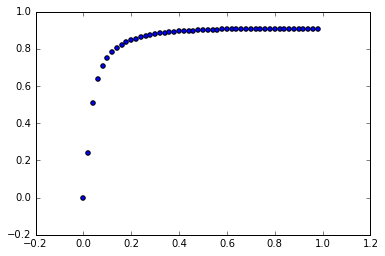

In [3]:
network = nx.barabasi_albert_graph(500,3)
plt.scatter(*zip(*inter_beta(network,0.1)))

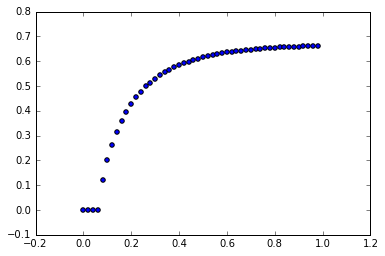

In [4]:
plt.scatter(*zip(*inter_beta(network,0.5)))

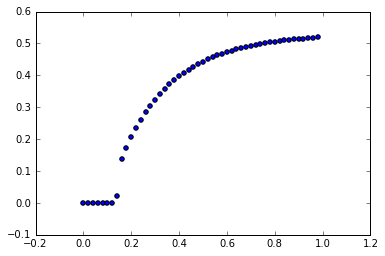

In [5]:
plt.scatter(*zip(*inter_beta(network,0.9)))

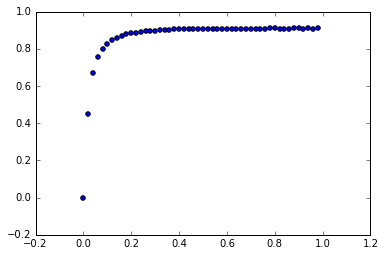

In [6]:
network = nx.barabasi_albert_graph(500,5)
plt.scatter(*zip(*inter_beta(network,0.1)))

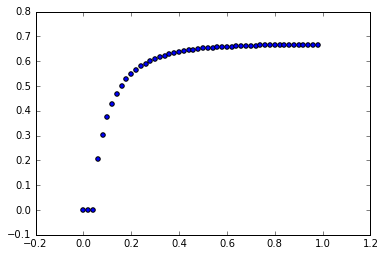

In [7]:
plt.scatter(*zip(*inter_beta(network,0.5)))

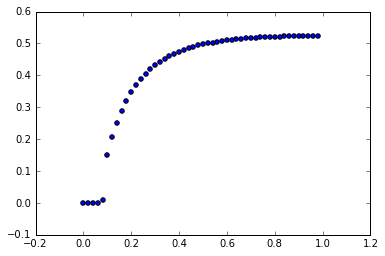

In [8]:
plt.scatter(*zip(*inter_beta(network,0.9)))

<h3>Real-World Social Network</h3>
Finally, we explore the infection rate dynamics and steady-state infection fraction as a function of infection rate when applied to a real world social network. We use the southern woman social network included in the networkx python package.